'''Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers'''




In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [ ]:
airline= pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
airline1= airline.drop(['ID#'], axis=1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Hierarchical

In [ ]:
# Normalization function # use sklearn library norm
# Normalize Heterogenous numerical data using z-score (x-mean/std) or custom defined function
def norm_func(i):
  x= (i-i.min())/(i.max()-i.min())
  return x

In [ ]:
# Normalized data frame (considering the numerical part of data)
airline1_norm= norm_func(airline1)
airline1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


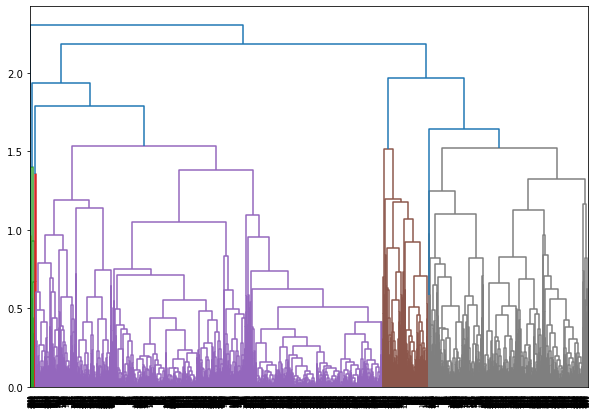

In [ ]:
# Create Dendrograms 
plt.figure(figsize= (10,7))
dendrograms = sch.dendrogram(sch.linkage(airline1_norm,'complete'))

In [ ]:
# Create Clusters(y)
hc= AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage= 'ward')
hc

AgglomerativeClustering(n_clusters=5)

In [ ]:
y_hc= hc.fit_predict(airline1_norm)
clusters= pd.DataFrame(y_hc,columns= ['Clusters'])

In [ ]:
y= pd.DataFrame(hc.fit_predict(airline1_norm),columns= ['Clusters'])
y['Clusters'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: Clusters, dtype: int64

In [ ]:
clusters

,Clusters
0,1
1,1
2,1
3,1
4,3
...,...
3994,0
3995,0
3996,0
3997,4


# K_Means

<AxesSubplot:xlabel='X', ylabel='Y'>

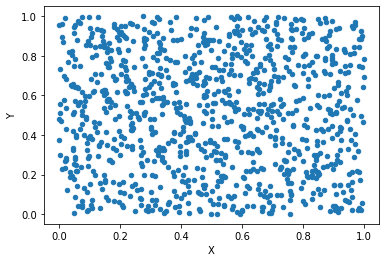

In [ ]:
# This generates two arrays of 1000 random numbers between 0 and 1 using NumPy's random.uniform() function, assigns them to variables X and Y, and creates a new empty DataFrame called df_xy with two columns named "X" and "Y". 
X= np.random.uniform(0,1,1000)
Y= np.random.uniform(0,1,1000)
df_xy= pd.DataFrame(columns= ["X","Y"])
df_xy.X= X
df_xy.Y= Y
df_xy.plot(x="X", y= "Y",kind='scatter')

<AxesSubplot:xlabel='X', ylabel='Y'>

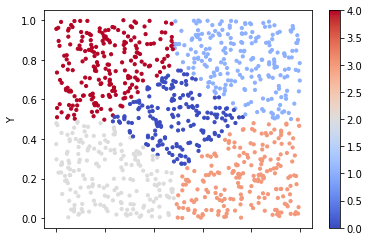

In [ ]:
model1= KMeans(n_clusters= 5).fit(df_xy)

df_xy.plot(x="X",y="Y",c=model1.labels_,kind="scatter", s=10, cmap= plt.cm.coolwarm)

# This performs K-means clustering on the df_xy DataFrame using scikit-learn's KMeans algorithm with 5 clusters.

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (1).csv


In [ ]:
air= pd.read_csv('EastWestAirlines.csv')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# Normalization function
def norm_func(i):
  x= (i-i.min())/(i.max()-i.min())
  return(x)

# Normalized dataframe (considering the numerical part of data)
df_norm= norm_func(air.iloc[:,1:])

df_norm.head(10) 

# This defines a function called norm_func that takes a single argument i and returns a normalized version of i. The function uses the minimum and maximum values of i to scale each element of i between 0 and 1. The resulting normalized array is returned by the function.

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [ ]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters
model= KMeans(n_clusters=5)
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

array([4, 4, 4, ..., 2, 1, 1], dtype=int32)

In [ ]:
md= pd.Series(model.labels_) # converting numpy array into pandas series object
air['clust']= md # Creating a new column and assigning it to new column
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [ ]:
air.iloc[:,1:7].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
1,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885


In [ ]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [ ]:
Wcss= []
for i in range(1,11):
  kmeans= KMeans(n_clusters= i,random_state= 2)
  kmeans.fit(df_norm)
  Wcss.append(kmeans.inertia_)

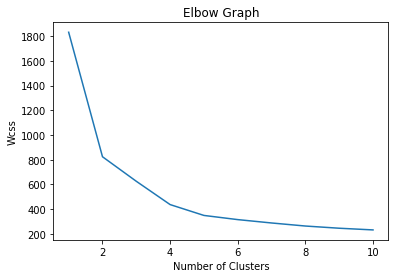

In [ ]:
plt.plot(range(1,11), Wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

# DBSCAN

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (2).csv


In [ ]:
air1= pd.read_csv('EastWestAirlines.csv')
air1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.drop(['ID#', 'Award?'], axis= 1, inplace= True)

In [ ]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,4
1,19244,0,1,1,1,215,2,0,0,6968,4
2,41354,0,1,1,1,4123,4,0,0,7034,4
3,14776,0,1,1,1,500,1,0,0,6952,4
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,1


In [ ]:
array= air.values

In [ ]:
array

array([[28143,     0,     1, ...,     0,  7000,     4],
       [19244,     0,     1, ...,     0,  6968,     4],
       [41354,     0,     1, ...,     0,  7034,     4],
       ...,
       [73597,     0,     3, ...,     0,  1402,     2],
       [54899,     0,     1, ...,     1,  1401,     1],
       [ 3016,     0,     1, ...,     0,  1398,     1]])

In [ ]:
stscaler= StandardScaler().fit(array)
X= stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00,  1.43507386e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00,  1.43507386e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00,  1.43507386e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  4.29341470e-03],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.11096810e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.11096810e-01]])

In [ ]:
dbscan= DBSCAN(eps=1, min_samples= 12)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=12)

In [ ]:
# Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [ ]:
cl= pd.DataFrame(dbscan.labels_, columns= ['clusters'])
cl

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,2
3995,2
3996,1
3997,2


In [ ]:
pd.concat([air,cl], axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust,clusters
0,28143,0,1,1,1,174,1,0,0,7000,4,0
1,19244,0,1,1,1,215,2,0,0,6968,4,0
2,41354,0,1,1,1,4123,4,0,0,7034,4,0
3,14776,0,1,1,1,500,1,0,0,6952,4,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,2
3995,64385,0,1,1,1,981,5,0,0,1395,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,1,2
